[Tutorial](https://lightning.ai/docs/pytorch/stable/starter/introduction.html)

In [8]:
from torchvision.transforms import v2
from torchvision.transforms.v2 import Normalize
from torchvision.transforms import Resize
from torch.utils.data import Dataset
import pandas as pd
from torchvision.io import decode_image
import os
from utils import dir_to_df
from dataloader import CustomImageDataset
from sklearn.model_selection import StratifiedShuffleSplit
import  matplotlib.pyplot as  plt
import torch

In [2]:
SEED = 5
## Dataloader
DATASET_PATH = os.path.join("..","dataset", "inaturalist_12K")

TRAIN_PATH = os.path.join(DATASET_PATH, "train")
TEST_PATH = os.path.join(DATASET_PATH, "val")

data_df = dir_to_df(TRAIN_PATH)
test_df = dir_to_df(TEST_PATH)
class_mapping_dict = {j: i for i, j in enumerate(test_df["label"].unique())}
data_df["label_id"] = data_df["label"].map(class_mapping_dict)
test_df["label_id"] = test_df["label"].map(class_mapping_dict)
## Randomize the dataframe
data_df = data_df.sample(frac=1.0)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)

# Perform the split
for train_idx, val_idx in split.split(data_df, data_df["label_id"]):
    train_set = data_df.iloc[train_idx]
    val_set = data_df.iloc[val_idx]

In [33]:
image_normalization = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

train_dataset = CustomImageDataset(
        dataset_df=train_set[:130],
        image_normalization=image_normalization,
        size=(256, 256),
        augmentation=False,
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9124069..2.3959913].


v
5


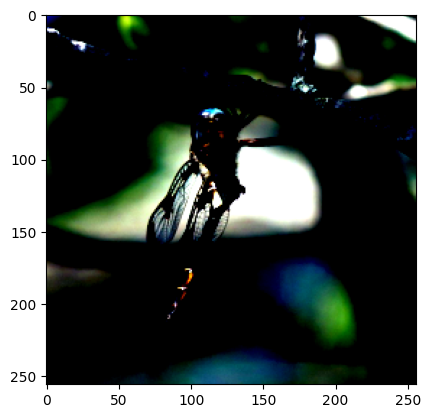

In [34]:
imgs, labels = train_dataset.__getitem__(40)
plt.imshow(torch.permute(imgs, (1,2,0)))
print(labels)


In [32]:
torch.mean(imgs.view(3, -1), dim=1)

tensor([-0.6003, -0.4210, -0.4739])

In [35]:
torch.mean(imgs.view(3, -1), dim=1)

tensor([-0.5739, -0.3924, -0.4502])

## Build the CNN model with flexibility

In [ ]:
from config import config
from CNNNetwork import CNNNetwork
from LightningModule import LightningModule
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl

In [ ]:
# Create dummy data
num_samples = 100
input_size = (3, 32, 32)  # Example input size
X = torch.randn(num_samples, *input_size)
y = torch.randint(0, 101010, (num_samples,))  # Dummy labels
dataset = TensorDataset(X, y)
train_loader = DataLoader(dataset, batch_size=32)
#val_loader = DataLoader(dataset, batch_size=32)
conf = config()
# Create and train the model
model = CNNNetwork(num_conv_layers=2, num_classes = 10)  # Reduced for testing
lit_model = LightningModule(model)
trainer = pl.Trainer(max_epochs=2, accelerator="gpu", devices=1) #Added accelerator gpu, can be cpu also, devices set to 1

trainer.fit(lit_model, train_loader)#, val_loader)

In [3]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)

In [8]:
output.sum(axis=1)

tensor([1., 1.])

## Inference

In [18]:
from LightningModule import LightningModule
from config import Config
import os 
import torch
import  matplotlib.pyplot as  plt
from torchvision.transforms.v2 import Normalize
from utils import dir_to_df
from dataloader import CustomImageDataset


In [16]:

config = Config()
lit_model = LightningModule.load_from_checkpoint(checkpoint_path=os.path.join("..","weights","part_a","test.ckpt"),
                                                 config = config)
lit_model.eval()


LightningModule(
  (CNNmodel): CNNNetwork(
    (conv_layers): ModuleList(
      (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (1): ELU(alpha=1.0)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (5): ELU(alpha=1.0)
      (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (9): ELU(alpha=1.0)
      (10): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (12): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (13): EL

In [20]:
## Test dataset loader
DATASET_PATH = os.path.join("..","dataset", "inaturalist_12K")

TRAIN_PATH = os.path.join(DATASET_PATH, "train")
TEST_PATH = os.path.join(DATASET_PATH, "val")

data_df = dir_to_df(TRAIN_PATH)
test_df = dir_to_df(TEST_PATH)
class_mapping_dict = {j: i for i, j in enumerate(test_df["label"].unique())}
data_df["label_id"] = data_df["label"].map(class_mapping_dict)
test_df["label_id"] = test_df["label"].map(class_mapping_dict)

image_normalization = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
test_dataset = CustomImageDataset(
    dataset_df=test_df, image_normalization=image_normalization, size=(256, 256),
    augmentation=False,
)


In [7]:
data_df.groupby(['label','label_id']).count()

,,image_path
label,label_id,
Amphibia,0,1000
Animalia,1,1000
Arachnida,2,1000
Aves,3,1000
Fungi,4,999
Insecta,5,1000
Mammalia,6,1000
Mollusca,7,1000
Plantae,8,1000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.622571].


0


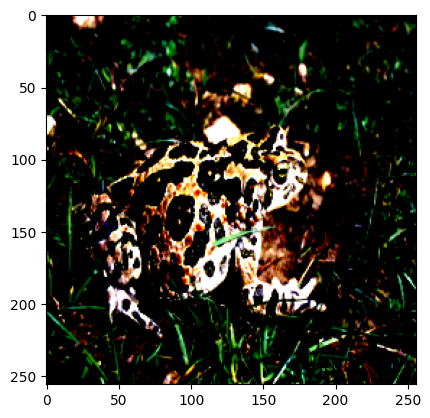

In [21]:
imgs, labels = test_dataset.__getitem__(40)
plt.imshow(torch.permute(imgs, (1,2,0)))
print(labels)
